# **NACA 0012 AIRFOIL SELF NOISE DATA**

# **EDA**


--- Basic Information ---

Shape of the dataset: (1503, 6)

Column Data Types:

frequency                                int64
attack_angle                           float64
chord_length                           float64
free_stream_velocity                   float64
suction_side_displacement_thickness    float64
scaled_sound_pressure                  float64
dtype: object

First 5 Rows of the Dataset:

   frequency  attack_angle  chord_length  free_stream_velocity  \
0        800           0.0        0.3048                  71.3   
1       1000           0.0        0.3048                  71.3   
2       1250           0.0        0.3048                  71.3   
3       1600           0.0        0.3048                  71.3   
4       2000           0.0        0.3048                  71.3   

   suction_side_displacement_thickness  scaled_sound_pressure  
0                             0.002663                126.201  
1                             0.002663                125.201  
2  

<Figure size 1000x800 with 0 Axes>

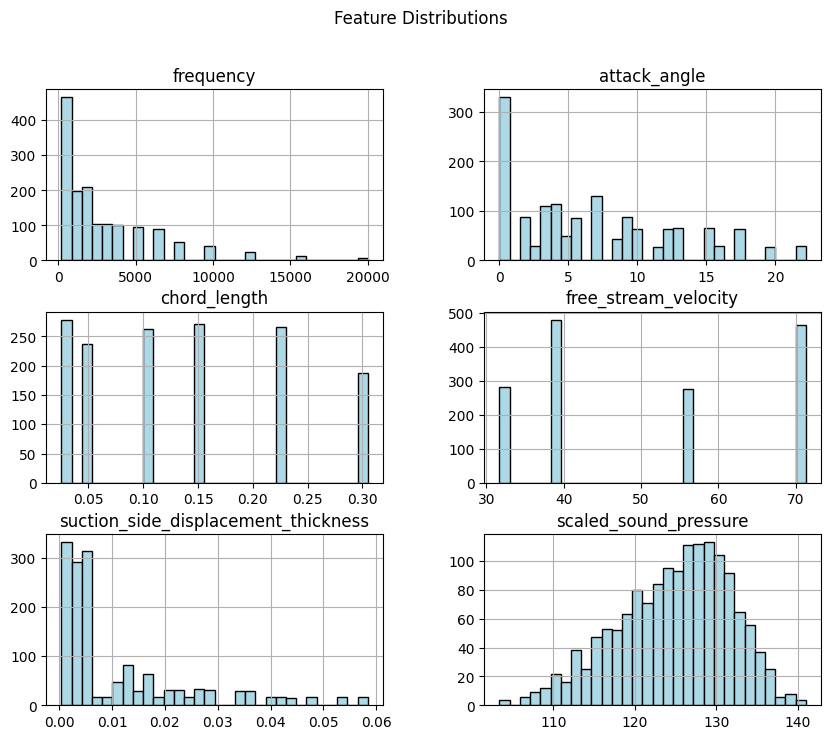


--- Correlation Matrix ---



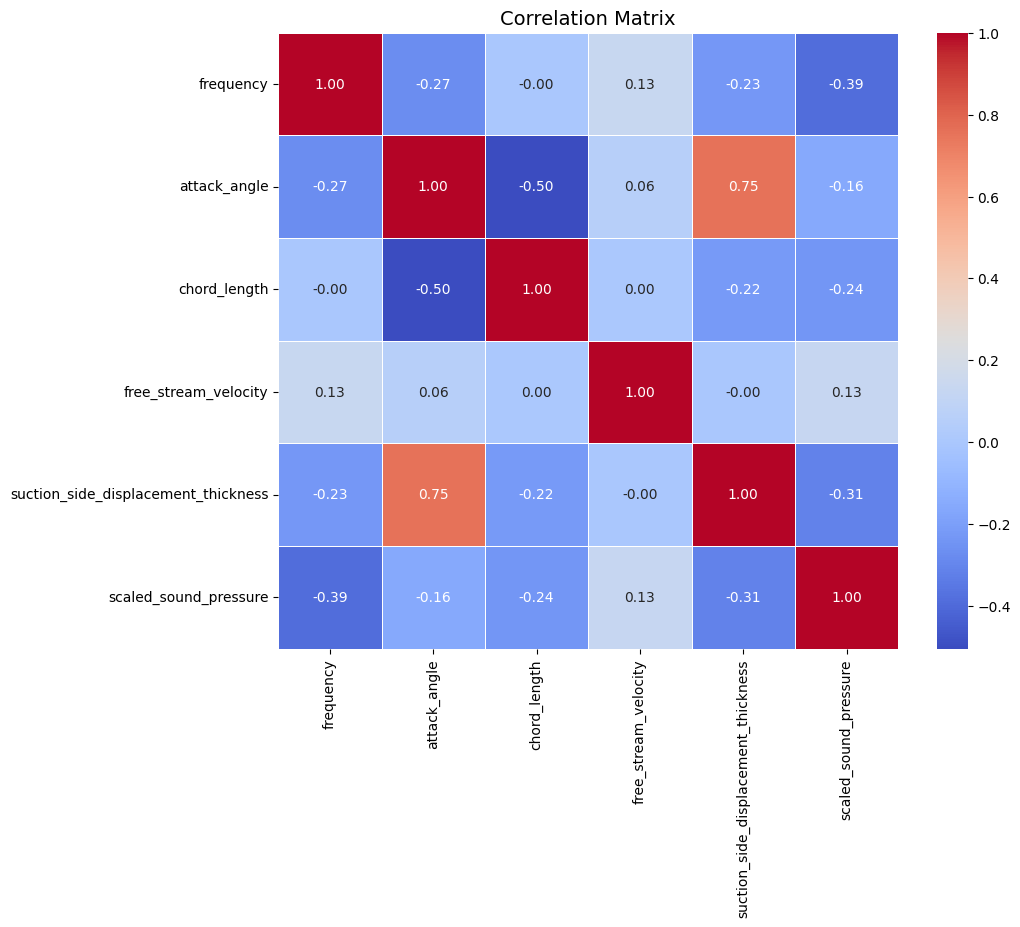


--- Boxplots for Outlier Detection ---



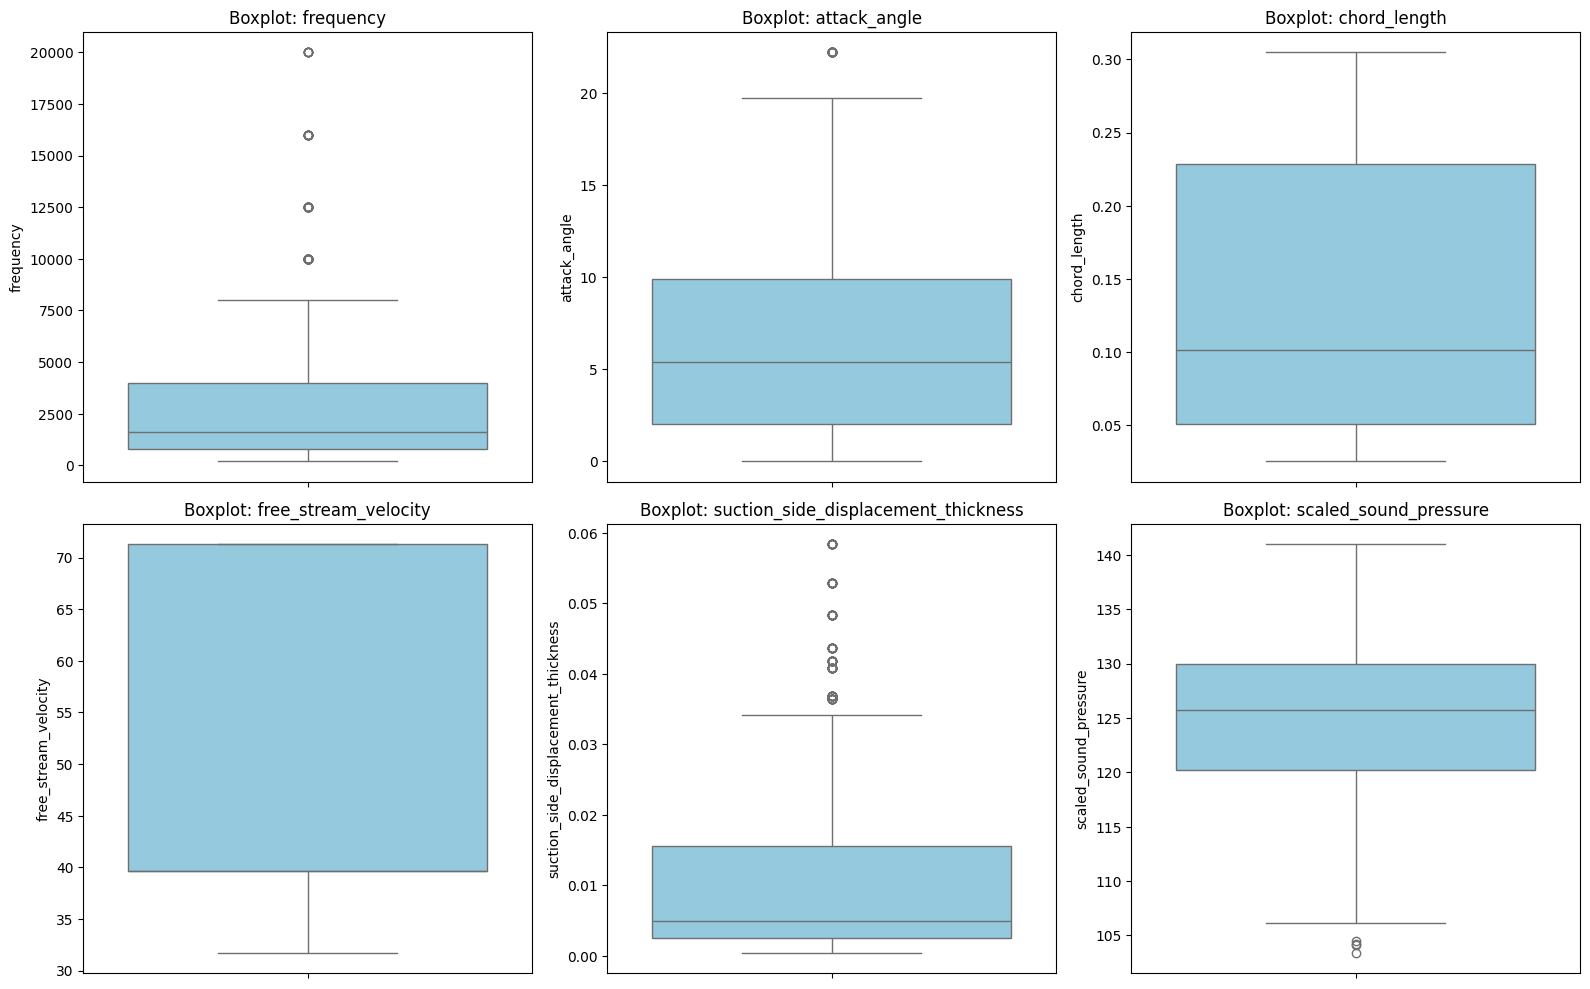


--- Scatter Plots for Feature Relationships ---



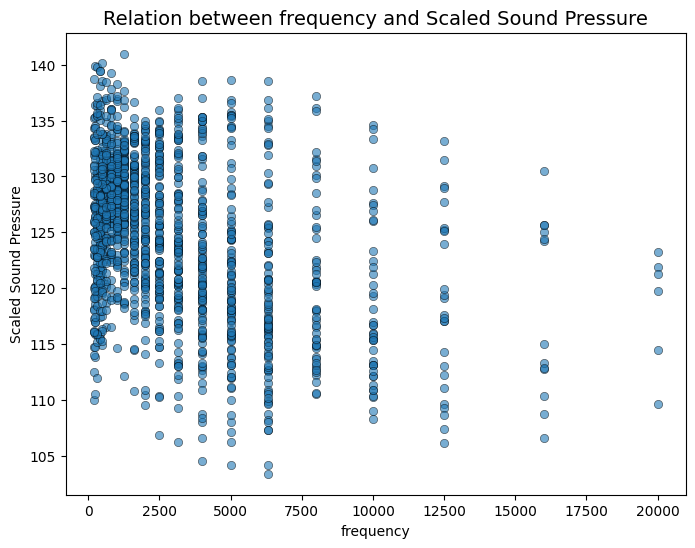

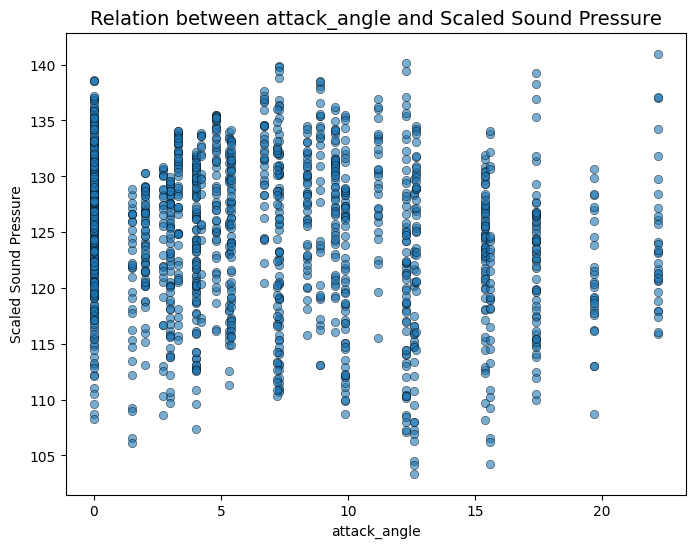

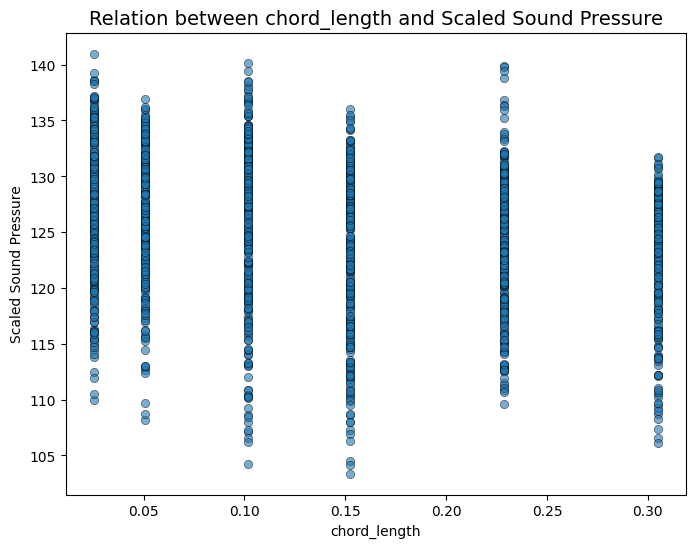

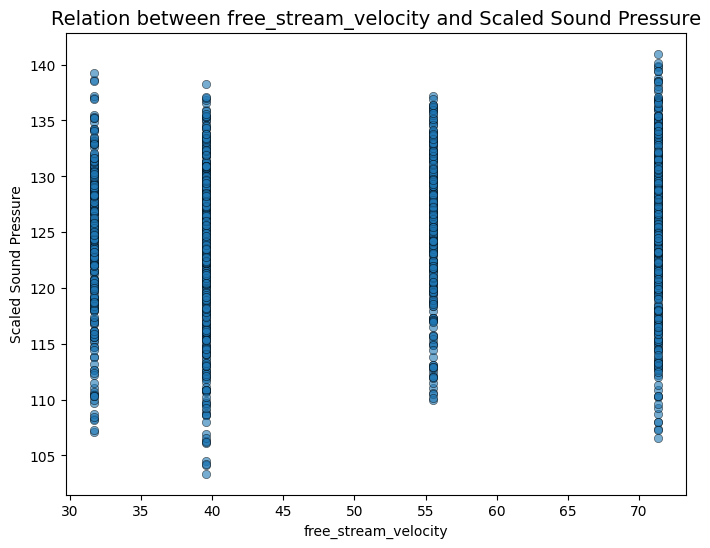

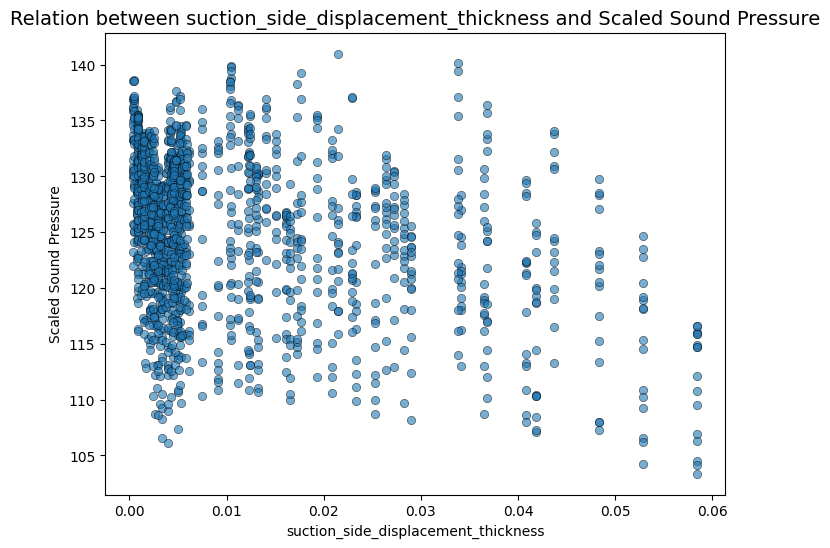

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
data = pd.read_csv("airfoil_self_noise.csv")

# Basic Information
print("\n--- Basic Information ---\n")
print("Shape of the dataset:", data.shape)
print("\nColumn Data Types:\n")
print(data.dtypes)
print("\nFirst 5 Rows of the Dataset:\n")
print(data.head())

# Check for missing values
print("\n--- Missing Values ---\n")
print(data.isnull().sum())

# Statistical Summary
print("\n--- Statistical Summary ---\n")
print(data.describe())

# Data Distribution Visualizations
print("\n--- Data Distribution Visualizations ---\n")
plt.figure(figsize=(10, 8))
data.hist(bins=30, figsize=(10, 8), color='lightblue', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=12)
plt.show()

# Correlation Matrix
print("\n--- Correlation Matrix ---\n")
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

# Boxplots for Detecting Outliers
print("\n--- Boxplots for Outlier Detection ---\n")
plt.figure(figsize=(16, 10))
for i, column in enumerate(data.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[column], color='skyblue')
    plt.title(f'Boxplot: {column}', fontsize=12)
plt.tight_layout()
plt.show()



# Feature-wise Scatter Plots against Target (if available)
print("\n--- Scatter Plots for Feature Relationships ---\n")
if 'scaled_sound_pressure' in data.columns:
    for column in data.columns:
        if column != 'scaled_sound_pressure':
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=data[column], y=data['scaled_sound_pressure'], alpha=0.6, edgecolor='k')
            plt.title(f'Relation between {column} and Scaled Sound Pressure', fontsize=14)
            plt.xlabel(column)
            plt.ylabel('Scaled Sound Pressure')
            plt.show()


# **FEATURE ENGINEERING**

In [3]:
# Create interaction terms that partly represents Reynolds Number
data['reynolds_number'] = data['free_stream_velocity'] * data['chord_length']

In [4]:
data.head()

,frequency,attack_angle,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure,reynolds_number
0,800,0.0,0.3048,71.3,0.002663,126.201,21.73224
1,1000,0.0,0.3048,71.3,0.002663,125.201,21.73224
2,1250,0.0,0.3048,71.3,0.002663,125.951,21.73224
3,1600,0.0,0.3048,71.3,0.002663,127.591,21.73224
4,2000,0.0,0.3048,71.3,0.002663,127.461,21.73224


# **APPLIED MACHINE LEARNING ALGORITHMS**

# **Regression**

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Define the feature variables (X) and the target variable (y)
X = data[['frequency', 'attack_angle', 'chord_length', 'free_stream_velocity', 'suction_side_displacement_thickness', 'reynolds_number']]
y = data['scaled_sound_pressure']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Print model coefficients and intercept
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")
print(f"Intercept: {model.intercept_}")


Mean Squared Error (MSE): 22.12825415939868
R² Score: 0.5583057433518974

Model Coefficients:
frequency: -0.0012716170570063812
attack_angle: -0.40569910314622176
chord_length: -34.18381430358943
free_stream_velocity: 0.09879277969049927
suction_side_displacement_thickness: -139.47161501113263
reynolds_number: -0.005641095151919781
Intercept: 132.4927103710732


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Define the feature variables (X) and the target variable (y)
X = data[['frequency', 'attack_angle', 'chord_length', 'free_stream_velocity', 'suction_side_displacement_thickness', 'reynolds_number']]
y = data['scaled_sound_pressure']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply polynomial feature transformation
for degree in range(1, 6):  # Try different degrees (1, 2, 3, 4, 5)
  poly = PolynomialFeatures(degree=degree, include_bias=False)
  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.transform(X_test)

  # Create a linear regression model
  model = LinearRegression()

  # Train the model on the polynomial-transformed training data
  model.fit(X_train_poly, y_train)

  # Make predictions on the test data
  y_pred = model.predict(X_test_poly)

  # Evaluate the model
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  # Print evaluation metrics
  print(f"At Degree = {degree} --> Mean Squared Error (MSE): {mse}")
  print(f"At Degree = {degree} --> R² Score: {r2}"+"\n")

# Print model coefficients and intercept
feature_names = poly.get_feature_names_out(input_features=X.columns)

At Degree = 1 --> Mean Squared Error (MSE): 22.128254159398743
At Degree = 1 --> R² Score: 0.5583057433518961

At Degree = 2 --> Mean Squared Error (MSE): 15.930427281773989
At Degree = 2 --> R² Score: 0.6820183740830178

At Degree = 3 --> Mean Squared Error (MSE): 11.91043965276014
At Degree = 3 --> R² Score: 0.7622599256641522

At Degree = 4 --> Mean Squared Error (MSE): 11.429741416017388
At Degree = 4 --> R² Score: 0.7718549731912054

At Degree = 5 --> Mean Squared Error (MSE): 18.264583700472535
At Degree = 5 --> R² Score: 0.6354271031752063



# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define features (X) and target (y)
X = data[['frequency', 'attack_angle', 'chord_length', 'free_stream_velocity', 'suction_side_displacement_thickness', 'reynolds_number']]
y = data['scaled_sound_pressure']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Acc_list={}
Acc_number_lis=[]
# Initialize the Random Forest Regressor
for estimators in range(10, 51, 10):
  for depth in range(5, 16, 5):
    rf = RandomForestRegressor(n_estimators=estimators, random_state=42, max_depth=depth)

    # Train the model
    rf.fit(X_train, y_train)

    # Make predictions
    y_pred = rf.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"At Estimators = {estimators} and Depth = {depth}:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}"+"\n")
    Acc_list[f"Estimators = {estimators} and Depth = {depth}"] = r2
    Acc_number_lis.append(r2)

key_with_max_value = max(Acc_list, key=Acc_list.get)
print(f" With maximum r2 score the Hyper parameters: {key_with_max_value} \n r2 score: {Acc_list[key_with_max_value]}")


At Estimators = 10 and Depth = 5:
Mean Squared Error: 13.626633805293796
R-squared: 0.7280035810376508

At Estimators = 10 and Depth = 10:
Mean Squared Error: 4.187151325389644
R-squared: 0.9164217529851729

At Estimators = 10 and Depth = 15:
Mean Squared Error: 3.411445261589002
R-squared: 0.9319053474323348

At Estimators = 20 and Depth = 5:
Mean Squared Error: 13.446405417676809
R-squared: 0.7316010561534887

At Estimators = 20 and Depth = 10:
Mean Squared Error: 4.137925138435785
R-squared: 0.917404339496408

At Estimators = 20 and Depth = 15:
Mean Squared Error: 3.2813135157992934
R-squared: 0.9345028611950051

At Estimators = 30 and Depth = 5:
Mean Squared Error: 13.256829261762684
R-squared: 0.7353851187669023

At Estimators = 30 and Depth = 10:
Mean Squared Error: 4.3876265688298925
R-squared: 0.9124201375396057

At Estimators = 30 and Depth = 15:
Mean Squared Error: 3.4248428214012465
R-squared: 0.9316379234783463

At Estimators = 40 and Depth = 5:
Mean Squared Error: 12.92071

# **Support Vector Regressor**

In [7]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Feature selection and target separation
X = data[["frequency", "attack_angle", "chord_length", "free_stream_velocity", "suction_side_displacement_thickness", "reynolds_number"]]
y = data["scaled_sound_pressure"]

# Data splitting (train-test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVR model
for kernel in ["linear", "rbf", "poly"]:
  svr = SVR(kernel=kernel)

  # Training the model
  svr.fit(X_train_scaled, y_train)

  # Predictions
  y_pred = svr.predict(X_test_scaled)

  # Evaluation
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print(f"Kernel: {kernel}")
  print("Mean Squared Error (MSE):", mse)
  print("R-squared (R2) Score:", r2 , "\n")


Kernel: linear
Mean Squared Error (MSE): 22.20129269906737
R-squared (R2) Score: 0.5568478468882525 

Kernel: rbf
Mean Squared Error (MSE): 14.053315525925862
R-squared (R2) Score: 0.719486738088255 

Kernel: poly
Mean Squared Error (MSE): 18.503420180696597
R-squared (R2) Score: 0.6306597726468641 



# **NEURAL NETWORKS**

# **Stochastic Gradient Descent (SGD)**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


# Feature selection and target separation
X = data[["frequency", "attack_angle", "chord_length", "free_stream_velocity", "suction_side_displacement_thickness", "reynolds_number"]]
y = data["scaled_sound_pressure"]

# Data splitting (train-test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation="relu"),  # Input layer with 64 neurons
    Dense(16, activation="relu"),
    Dense(16, activation="relu"), # Hidden layer with 16 neurons
    Dense(1)  # Output layer (regression task)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss="mse", metrics=["mae"])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=1, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
961/961 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2476.5139 - mae: 30.8691 - val_loss: 108.2164 - val_mae: 9.0950
Epoch 2/50
961/961 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 60.0164 - mae: 5.8332 - val_loss: 108.7031 - val_mae: 7.8144
Epoch 3/50
961/961 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 65.1059 - mae: 6.0000 - val_loss: 56.9186 - val_mae: 6.1096
Epoch 4/50
961/961 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 54.5062 - mae: 5.7571 - val_loss: 93.5045 - val_mae: 8.4601
Epoch 5/50
961/961 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 75.5082 - mae: 6.8324 - val_loss: 29.0455 - val_mae: 4.3149
Epoch 6/50
961/961 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 41.3691 - mae: 5.0229 - val_loss: 18.7655 - val_mae: 3.1647
Epoch 7/50
961/961 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 31.2085 - mae: 4.2461 - val_loss: 16.1211 - val_mae: 3.1258
Epoch 8/50
961/961 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 39.4678 - mae: 4.8589 - val_loss: 67.5779 - val_mae: 7.3494
Epoch 9/50
961/961 ━━━━━━━━━━━━━━━━

# **ANN With Different Hyperparameters**

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

X = data[["frequency", "attack_angle", "chord_length", "free_stream_velocity", "suction_side_displacement_thickness", "reynolds_number"]]
y = data["scaled_sound_pressure"]

# Data splitting (train-test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter grid
layer_sizes = [32, 64, 128]
learning_rates = [0.01, 0.001]
epochs_list = [50, 100]
batch_sizes = [16, 32]

# Iterate over hyperparameters
best_r2 = -np.inf
best_params = {}

for layer_size in layer_sizes:
    for learning_rate in learning_rates:
        for epochs in epochs_list:
            for batch_size in batch_sizes:
                # Build the neural network
                model = Sequential([
                    Dense(layer_size, input_dim=X_train_scaled.shape[1], activation="relu"),
                    Dense(layer_size // 2, activation="relu"), # Hidden layer size is the half of the input
                    Dense(1)
                ])

                # Compile the model
                model.compile(optimizer=Adam(learning_rate=learning_rate), loss="mse", metrics=["mae"])

                # Train the model
                model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                # Evaluate the model
                y_pred = model.predict(X_test_scaled)
                r2 = r2_score(y_test, y_pred)
                mse = mean_squared_error(y_test, y_pred)
                print(f"Input Layer Size: {layer_size}, Learning Rate: {learning_rate}, Epochs: {epochs}, Batch Size: {batch_size}, Mean Squared Error (MSE): {mse} R2 Score: {r2}")

                # Track the best R2 score
                if r2 > best_r2:
                    best_r2 = r2
                    best_params = {
                        "layer_size": layer_size,
                        "learning_rate": learning_rate,
                        "epochs": epochs,
                        "batch_size": batch_size
                    }
                    best_mse = mse
print("Best MSE:", best_mse)
print("Best R2 Score:", best_r2)
print("Best Hyperparameters:", best_params)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Input Layer Size: 32, Learning Rate: 0.01, Epochs: 50, Batch Size: 16, Mean Squared Error (MSE): 12.569757490831545 R2 Score: 0.7490995154354901
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Input Layer Size: 32, Learning Rate: 0.01, Epochs: 50, Batch Size: 32, Mean Squared Error (MSE): 18.17950943946029 R2 Score: 0.637125240416717
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Input Layer Size: 32, Learning Rate: 0.01, Epochs: 100, Batch Size: 16, Mean Squared Error (MSE): 14.958580177230843 R2 Score: 0.7014170704882864
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Input Layer Size: 32, Learning Rate: 0.01, Epochs: 100, Batch Size: 32, Mean Squared Error (MSE): 9.943664761003342 R2 Score: 0.8015180238200655
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Input Layer Size: 32, Learning Rate: 0.001, Epochs: 50, Batch Size: 16, Mean Squared Error (MSE): 20.610426885340992 R2 Score: 0.5886025568603583
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Input Layer Size: 32, Learning Rate: 